## Mumbai House Price Prediction using Decision Trees ( Regression Trees )

In [1]:
# Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Obtain the modified csv 
data = "../assets/data/modified_mumbai_house_prices.csv"
house_price = pd.read_csv(data)

# Refer assets/scripts/house-price-dataset.py for preprocessing steps

In [3]:
# printing the info for dataset
print(house_price.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bhk        76038 non-null  int64  
 1   type       76038 non-null  float64
 2   area       76038 non-null  int64  
 3   price      76038 non-null  float64
 4   status     76038 non-null  int64  
 5   age        76038 non-null  float64
 6   latitude   76038 non-null  float64
 7   longitude  76038 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 4.6 MB
None


In [4]:
house_price.head()

,bhk,type,area,price,status,age,latitude,longitude
0,3,0.25,685,2.5000,1,1.0,19.112122,72.867676
1,2,0.25,640,0.5251,0,1.0,18.969048,72.821182
2,2,0.25,610,1.7300,0,1.0,18.563005,73.906578
3,2,0.25,876,0.5998,0,1.0,18.999653,73.126328
4,2,0.25,659,0.9411,0,1.0,18.969048,72.821182


In [5]:
house_price.shape

(76038, 8)

In [15]:
# Define the ratios for train, test, and validation sets
test_ratio = 0.05
val_ratio = 0.05

indices = list(house_price.index)

# Calculate the number of samples for the testing and validation sets
test_size = int(test_ratio * len(house_price))
val_size = int(val_ratio * len(house_price))

# Split the indices into training, testing, and validation sets
test_indices = indices[:test_size]
val_indices = indices[test_size:test_size+val_size]
train_indices = indices[test_size+val_size:]

# Create training, validation, and testing sets
X_train = house_price.loc[train_indices]
X_val = house_price.loc[val_indices]
X_test = house_price.loc[test_indices]

# Extract target variable
y_train = X_train.pop("price")
y_val = X_val.pop("price")
y_test = X_test.pop("price")

print("The size of X_train is: ", X_train.shape)
print("The size of y_train is: ", len(y_train))
print("The size of X_val is: ", X_val.shape)
print("The size of y_val is: ", len(y_val))
print("The size of X_test is: ", X_test.shape)
print("The size of y_test is: ", len(y_test))

The size of X_train is:  (68436, 7)
The size of y_train is:  68436
The size of X_val is:  (3801, 7)
The size of y_val is:  3801
The size of X_test is:  (3801, 7)
The size of y_test is:  3801


In [16]:
# First we define a decision node using class
class Node:
   def __init__(self, dim, val, left, right):
      self.left = None
      self.right = None
      self.dim = dim
      self.val = val

# Defining class for a leaf node
class Leaf:
   def __init__(self, data):
      self.data = data

In [17]:
# MAE loss
def calculate_loss(y):
    if len(y) == 0:
        return 0
    return (abs(y - y.mean())).mean()

In [38]:
def get_best_split(X_train, y_train):
    best_loss = 999999
    best_split_val = 0
    best_split_dim = 0
    for col in X_train.columns:
        print("Testing: ", col)
        data = X_train[col].sort_values().reset_index(drop=True)

        for i in range(len(data) - 1):
            split_val = (data.iloc[i] + data.iloc[i + 1]) / 2
            
            left_mask = X_train[col] <= split_val  
            right_mask = X_train[col] > split_val

            X_left = X_train[left_mask]
            y_left = y_train[left_mask]

            X_right = X_train[right_mask]
            y_right = y_train[right_mask]

            left_loss = calculate_loss(y_left)
            right_loss = calculate_loss(y_right)  

            total_loss = (len(X_left)/len(X_train))*left_loss + (len(X_right)/len(X_train))*right_loss

            if total_loss < best_loss:
                best_loss = total_loss
                best_split_val = split_val
                best_split_dim = col
    
    left_mask = X_train[best_split_dim] <= best_split_val  
    right_mask = X_train[best_split_dim] > best_split_val

    X_left = X_train[left_mask]
    y_left = y_train[left_mask]

    X_right = X_train[right_mask]
    y_right = y_train[right_mask]
    
    return best_split_dim, best_split_val, X_left, y_left, X_right, y_right


In [39]:
best_split_dim, best_split_val, X_left, y_left, X_right, y_right = get_best_split(X_train, y_train)

Testing:  bhk
Testing:  type


KeyboardInterrupt: 

In [26]:
print(best_split_dim, best_split_val)

bhk 2.0


In [27]:
print(X_left)

      bhk  type  area  status  age   latitude  longitude
1       2  0.25   640       0  1.0  18.969048  72.821182
2       2  0.25   610       0  1.0  18.563005  73.906578
3       2  0.25   876       0  1.0  18.999653  73.126328
4       2  0.25   659       0  1.0  18.969048  72.821182
5       2  0.25   826       0  1.0  19.004976  72.853554
...   ...   ...   ...     ...  ...        ...        ...
3795    1  0.25   711       1  1.0  18.969048  72.821182
3796    2  0.25  1010       1  1.0  18.969048  72.821182
3798    2  0.25  1200       1  1.0  19.306516  72.861934
3799    2  0.25  1010       1  1.0  18.969048  72.821182
3800    2  0.25  1010       1  1.0  18.969048  72.821182

[3266 rows x 7 columns]


In [28]:
print(X_right)

      bhk  type  area  status  age   latitude  longitude
0       3  0.25   685       1  1.0  19.112122  72.867676
6       5  0.75  2921       0  1.0  18.969048  72.821182
7       3  0.25   778       0  1.0  19.074877  72.858879
12      3  0.25   753       0  1.0  18.969048  72.821182
17      3  0.25  1259       1  1.0  19.129242  73.001350
...   ...   ...   ...     ...  ...        ...        ...
3774    5  0.25  2500       1  0.0  19.129242  73.001350
3784    3  0.25  1575       1  0.0  18.999653  73.126328
3787    3  0.25  1134       1  0.0  18.969048  72.821182
3791    3  0.25  1600       1  0.0  18.969048  72.821182
3797    4  0.25  1110       1  1.0  18.969048  72.821182

[535 rows x 7 columns]


In [29]:
best_split_dim, best_split_val, X_left, y_left, X_right, y_right = get_best_split(X_left, y_left)

In [30]:
print(best_split_dim, best_split_val)

bhk 1.0


In [31]:
print(X_left)

      bhk  type  area  status  age   latitude  longitude
8       1  0.25   396       1  1.0  18.969048  72.821182
10      1  0.00   502       0  1.0  18.969048  72.821182
14      1  0.25   557       0  1.0  19.430656  72.964874
16      1  0.25   450       0  1.0  18.969048  72.821182
21      1  0.25   483       0  1.0  19.271147  73.039871
...   ...   ...   ...     ...  ...        ...        ...
3786    1  0.25   610       1  0.0  18.969048  72.821182
3789    1  0.25   770       1  0.0  18.969048  72.821182
3792    1  0.25   710       1  1.0  18.969048  72.821182
3794    1  0.25   710       1  0.0  18.969048  72.821182
3795    1  0.25   711       1  1.0  18.969048  72.821182

[1714 rows x 7 columns]


In [33]:
best_split_dim, best_split_val, X_left, y_left, X_right, y_right = get_best_split(X_left, y_left)

In [34]:
print(best_split_dim, best_split_val)

longitude 72.866081235


In [35]:
print(X_left)

      bhk  type  area  status  age   latitude  longitude
8       1  0.25   396       1  1.0  18.969048  72.821182
10      1  0.00   502       0  1.0  18.969048  72.821182
16      1  0.25   450       0  1.0  18.969048  72.821182
22      1  0.25   320       0  1.0  18.969048  72.821182
23      1  0.25   396       0  1.0  18.969048  72.821182
...   ...   ...   ...     ...  ...        ...        ...
3786    1  0.25   610       1  0.0  18.969048  72.821182
3789    1  0.25   770       1  0.0  18.969048  72.821182
3792    1  0.25   710       1  1.0  18.969048  72.821182
3794    1  0.25   710       1  0.0  18.969048  72.821182
3795    1  0.25   711       1  1.0  18.969048  72.821182

[841 rows x 7 columns]


In [ ]:
def BuildTree(X_train, y_train, K=2):
    if (len(X_train) <= K):
        # Returing average of nodes
        return Leaf(np.mean(y_train))
    else:
        split_dim, split_val, left_X, left_y, right_X, right_y = get_best_split(X_train, y_train)
        return Node(split_dim, split_val, BuildTree(left_X, left_y), BuildTree(right_X, right_y))

In [ ]:
def split

In [8]:
W = np.zeros((X_train.shape[1], 1))
b = 0
y_train = np.array(y_train)
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = np.array(y_test)
y_test = y_test.reshape(y_test.shape[0], 1)
y_val = np.array(y_val)
y_val = y_val.reshape(y_val.shape[0], 1)

In [35]:
def fit(X, y, W, b, learning_rate=0.01, num_iterations=1000, l2_lambda=0.01):
    m = X.shape[0]
    total_losses = []

    for i in range(num_iterations):
        Z = np.dot(X, W) + b
        diff = Z - y
        dw = (2/m) * np.dot(X.T, diff) + (l2_lambda / m) * W  # L2 regularization
        db = (2/m) * np.sum(diff)

        W = W - learning_rate * dw
        b = b - learning_rate * db

        loss = (1/m) * np.sum(np.abs(diff))
        regularization_loss = (l2_lambda / (2 * m)) * np.sum(np.square(W))
        total_loss = loss + regularization_loss

        total_losses.append(total_loss)
        
        if (i+1) % 500 == 0:
            print("Loss after iteration %i: %f" % (i+1, total_loss))
        
    return W, b, total_losses

In [36]:
def predict(X, W, b):
    z = np.dot(X, W) + b
    # For all negative values, replace them with 0
    z[z < 0] = 0
    return z

In [37]:
# Tuning hyperparameters using validation set
W, b, total_losses = fit(X_train, y_train, W, b, 0.001, 2000, 0.1)

# Calculate the mean absolute error on validation data in Cr
z = predict(X_val, W, b)
mae = np.sum(np.abs(z - y_val)) / len(y_val)
mse = np.sum(np.square(z - y_val)) / len(y_val)
print(f'Mean absolute error on validation set: {mae}')
print(f'Mean squared error on validation set: {mse}')

# Reset parameters
W = np.zeros((X_train.shape[1], 1))
b = 0

Loss after iteration 500: 0.891111
Loss after iteration 1000: 0.801873
Loss after iteration 1500: 0.788157
Loss after iteration 2000: 0.785861
Mean absolute error on validation set: 0.5668883910629853
Mean squared error on validation set: 0.6264488918184407


In [38]:
# Train on both training and validation data
W, b, total_losses = fit(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)), W, b, 0.001, 2000, 0.1)

Loss after iteration 500: 0.873261
Loss after iteration 1000: 0.786423
Loss after iteration 1500: 0.773221
Loss after iteration 2000: 0.771628


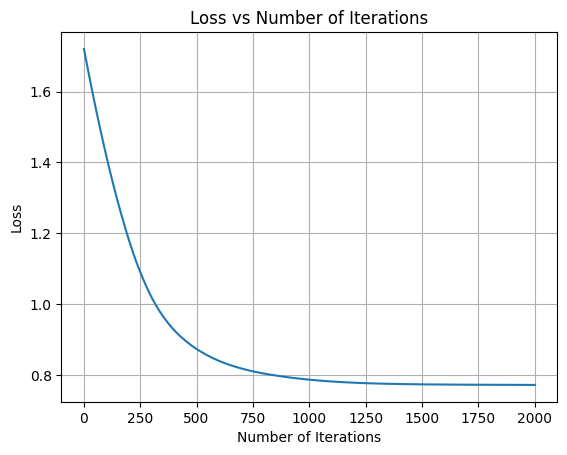

In [39]:
# Plotting missclassifications against the number of iterations
import matplotlib.pyplot as plt
plt.plot(range(1, len(total_losses) + 1), total_losses)
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Number of Iterations')
plt.grid(True)
plt.show()

In [40]:
# Calculate the mean absolute error on test data in Cr
z = predict(X_test, W, b)
mae = np.sum(np.abs(z - y_test)) / len(y_test)
mse = np.sum(np.square(z - y_test)) / len(y_test)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.7016635197303815
Mean Absolute Error: 0.554220297616918


In [41]:
print(W)
print(b)

[[ 0.49672108]
 [ 0.00182022]
 [ 1.26634035]
 [-0.1212638 ]
 [ 0.02979267]
 [ 0.02336477]
 [-0.03191551]]
1.7101168090464274


In [42]:
# Testing with our own data
X_test.loc[0, "bhk"] = 4
X_test.loc[0, "type"] = 0.2
X_test.loc[0, "area"] = 1620
X_test.loc[0, "age"] = 1
X_test.loc[0, "status"] = 1
X_test.loc[0, "latitude"] = 19.1386
X_test.loc[0, "longitude"] = 72.8429

# Normalizing the sample
X_test.loc[0] = (X_test.loc[0] - X_mean) / X_std

z = predict(X_test.loc[0], W, b)
print("The price of house in Cr: ", z)

The price of house in Cr:  [3.75480043]


In [43]:
# Verifying implementation using scikit learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the Linear Regression model
model = LinearRegression()
model.fit(np.concatenate((X_train.values, X_val.values)), np.concatenate((y_train, y_val)))
y_pred = model.predict(X_test.values)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error using scikit learn:", mse)
print("Mean Absolute Error using scikit learn:", mae)

Mean Squared Error using scikit learn: 0.7406033976904457
Mean Absolute Error using scikit learn: 0.5876999543103888
